In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.stats import norm

In [2]:
# 1st model

def phi1(u):
    if u>0:
        return (1-np.exp(-u))/u;
    if u==0:
        return 1;

In [3]:
def psi1(z):
    return abs(z)+0.5*(1+np.power(1+abs(z),0.5));

In [4]:
def var1(t,k):
    return t*psi1(k*phi1(t));

In [5]:
k = np.arange(-5, 5, 0.25)
t = np.arange(0.1, 5, 0.1)
k, t = np.meshgrid(k, t)
x=k.shape[0]
y=k.shape[1]

In [6]:
#total variance
w=np.zeros((x,y))
for i in range(x):
    for j in range(y):
        w[i,j]=var1(t[i,j],k[i,j])

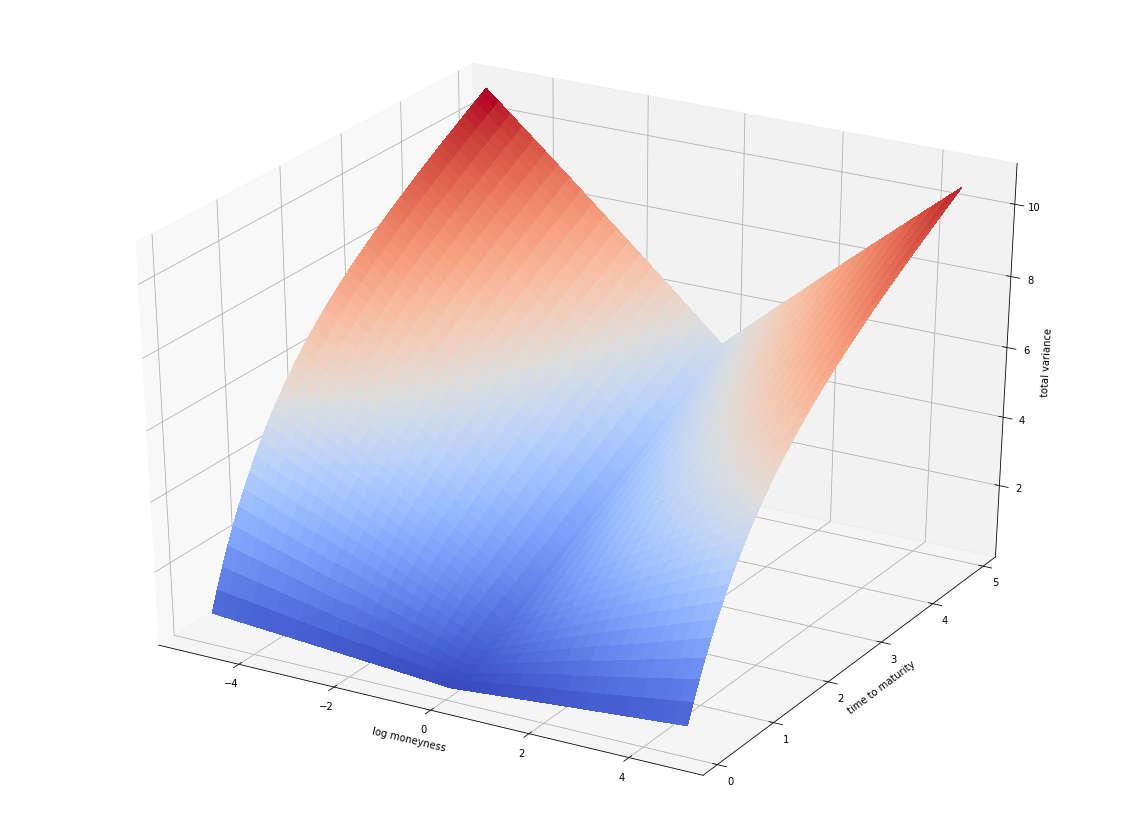

In [8]:
fig = plt.figure(figsize=(20,15))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(k, t, w,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('log moneyness')
ax.set_ylabel('time to maturity')
ax.set_zlabel('total variance')

plt.show()

In [9]:
#implied vol
sigma=np.zeros((x,y))
for i in range(x):
    for j in range(y):
        sigma[i,j]=np.power(w[i,j]/t[i,j],0.5)

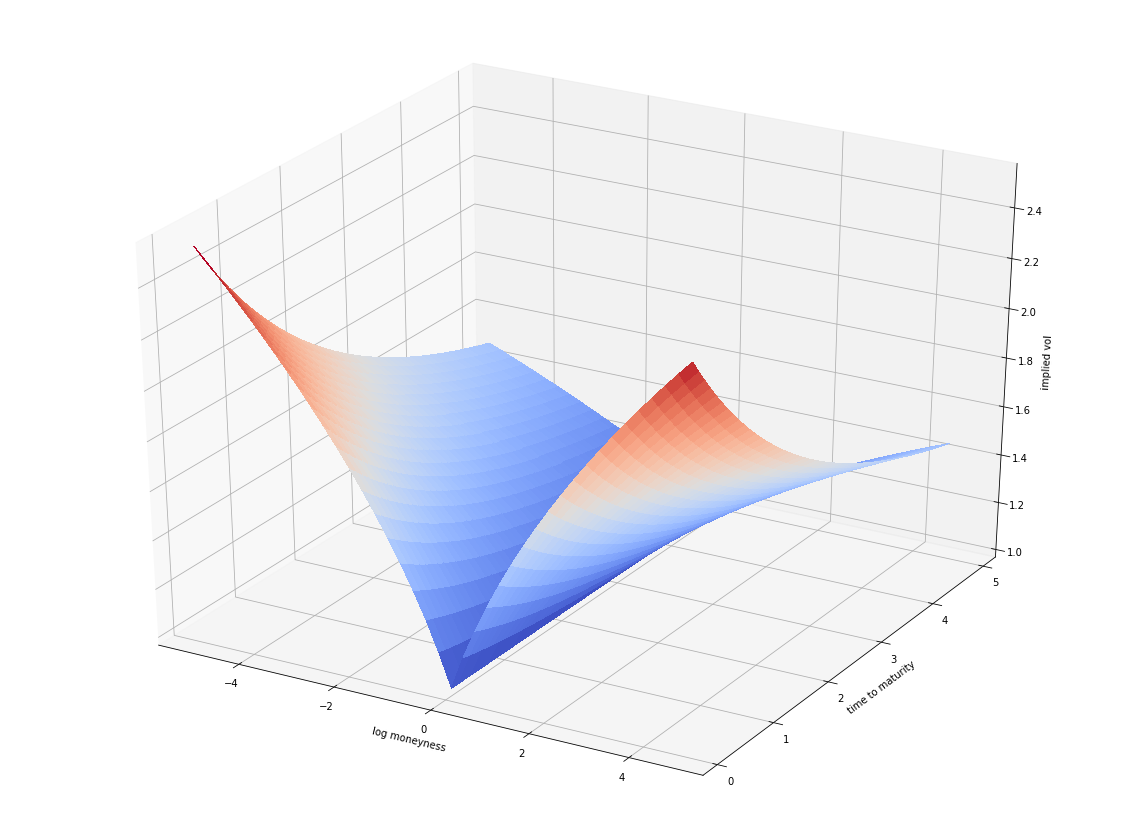

In [10]:
fig = plt.figure(figsize=(20,15))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(k, t, sigma,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('log moneyness')
ax.set_ylabel('time to maturity')
ax.set_zlabel('implied vol')

plt.show()

In [11]:
#call price
def d1(k,sigma,r,t):
    return (k+(r+np.power(sigma,2)/2)*t)/(sigma*np.power(t,0.5));

In [12]:
def d2(k,sigma,r,t):
    return d1(k,sigma,r,t)-sigma*np.power(t,0.5);

In [13]:
S0=1
r=0
C=np.zeros((x,y))
for i in range(x):
    for j in range(y):
        K=S0/np.exp(k[i,j])
        C[i,j]=S0*norm.cdf(d1(k[i,j],sigma[i,j],r,t[i,j]))-norm.cdf(d2(k[i,j],sigma[i,j],r,t[i,j]))*K*np.exp(-r*t[i,j])



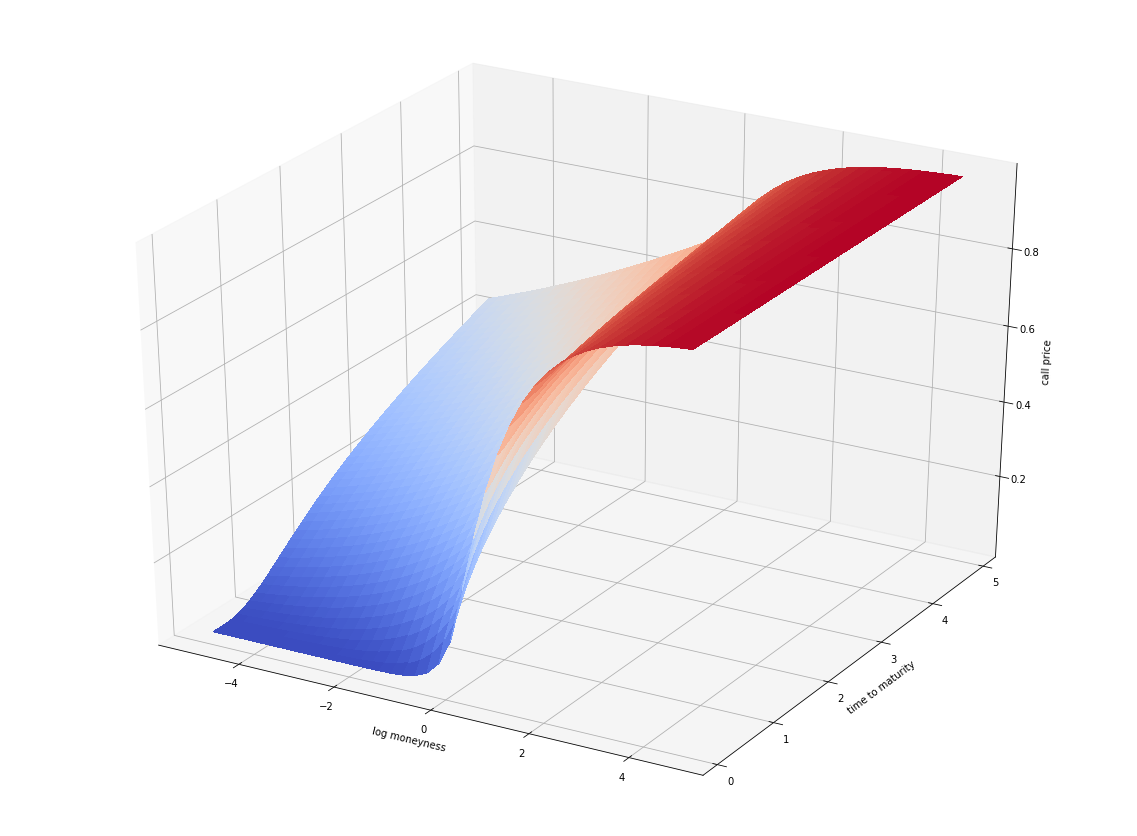

In [136]:
fig = plt.figure(figsize=(20,15))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(k, t, C,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('log moneyness')
ax.set_ylabel('time to maturity')
ax.set_zlabel('call price')
plt.show()

In [139]:
#tried to reproduce L operator surface from paper

#L operator
def dk(k,t):
    e=np.exp(-t)
    return (1-e)*(1+(t/(k*(1-e)+t))**0.5)/4;

In [140]:
def dkk(k,t):
    e=np.exp(-t)
    return -(t**0.5)*((1-e)**2)*((k*(1-e)+t)**-1.5)/8;

In [141]:
def L(k,t,w):
    d_k=dk(k,t)
    d_kk=dkk(k,t)
    a=(1-(k*d_k)/(2*w))**2
    b=(d_k**2)/4
    c=((1/w)+0.25)
    d=d_kk/2
    return a-b*c+d;

In [142]:
Lw=np.zeros((x,y))
for i in range(x):
    for j in range(y):
        Lw[i,j]=L(k[i,j],t[i,j],w[i,j])

/Users/michaelchan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/Users/michaelchan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


/Users/michaelchan/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


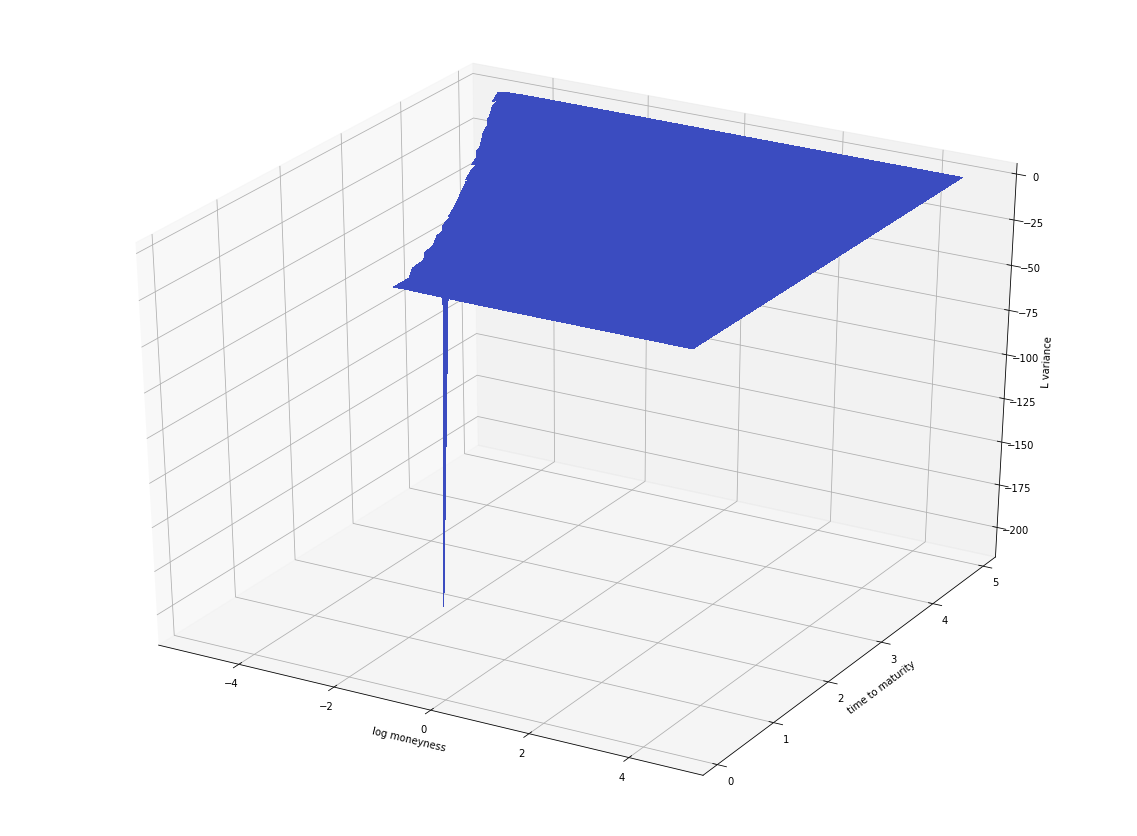

In [143]:
fig = plt.figure(figsize=(20,15))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(k, t, Lw,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('log moneyness')
ax.set_ylabel('time to maturity')
ax.set_zlabel('L variance')
plt.show()

In [112]:
Lw

array([[        nan,         nan,         nan, ...,  0.75768473,
         0.75672035,  0.75588049],
       [        nan,         nan,         nan, ...,  0.75749745,
         0.75652045,  0.75566851],
       [        nan,         nan,         nan, ...,  0.75734396,
         0.75634874,  0.7554797 ],
       ..., 
       [ 1.15362242,  1.14608411,  1.13850922, ...,  0.85324809,
         0.84944596,  0.84583825],
       [ 1.15233792,  1.14485594,  1.1373367 , ...,  0.8540023 ,
         0.85020112,  0.84659307],
       [ 1.15107221,  1.14364595,  1.13618168, ...,  0.85474821,
         0.85094821,  0.84734008]])

In [145]:
#2nd model

def phi2(u,alpha):
    if u>0:
        return alpha*(1-np.exp(-u))/u;
    if u==0:
        return alpha;

In [146]:
def psi2(z,v):
    return np.power((1+np.power(abs(z),v)),1/v);


In [147]:
def var2(t,k,alpha,v):
    return t*psi2(k*phi2(t,alpha),v);

In [175]:
# total variance
w2=np.zeros((x,y))
alpha=0.5
v=10
for i in range(x):
    for j in range(y):
        w2[i,j]=var2(t[i,j],k[i,j],alpha,v)

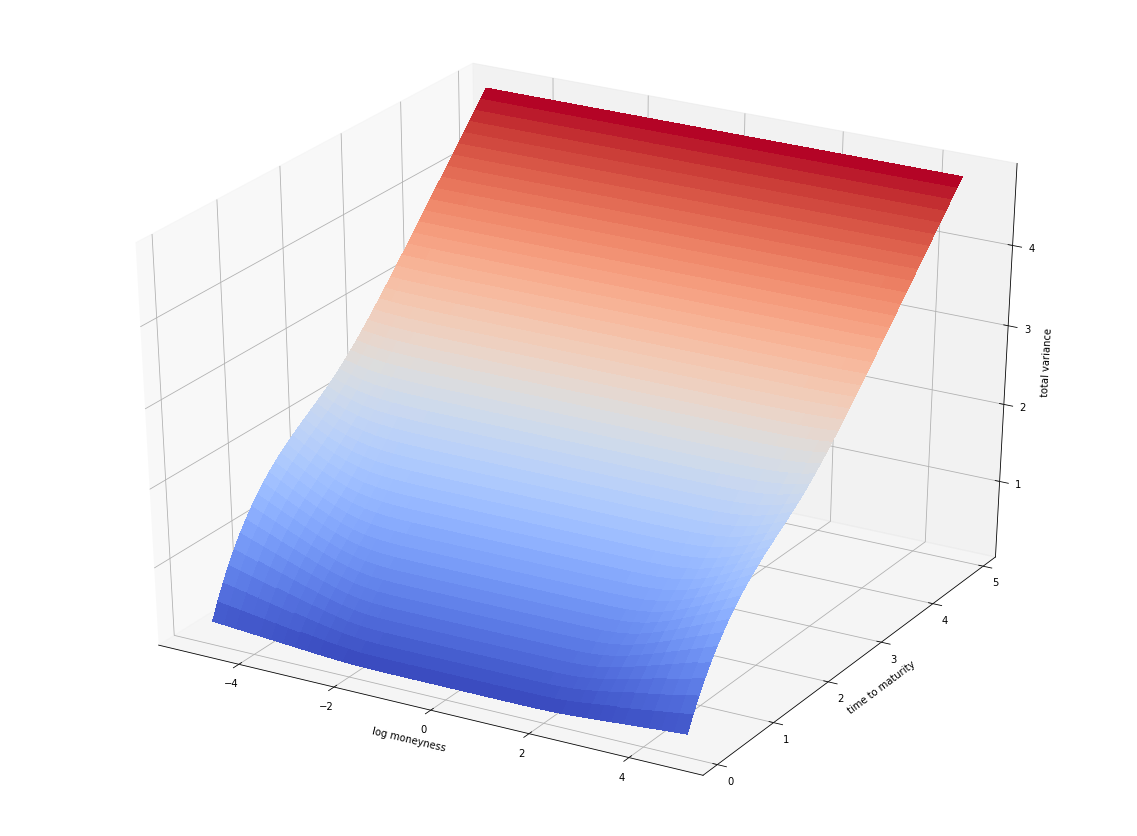

In [176]:
fig = plt.figure(figsize=(20,15))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(k, t, w2,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('log moneyness')
ax.set_ylabel('time to maturity')
ax.set_zlabel('total variance')
plt.show()

In [177]:
#implied vol
sigma2=np.zeros((x,y))
for i in range(x):
    for j in range(y):
        sigma2[i,j]=np.power(w2[i,j]/t[i,j],0.5)


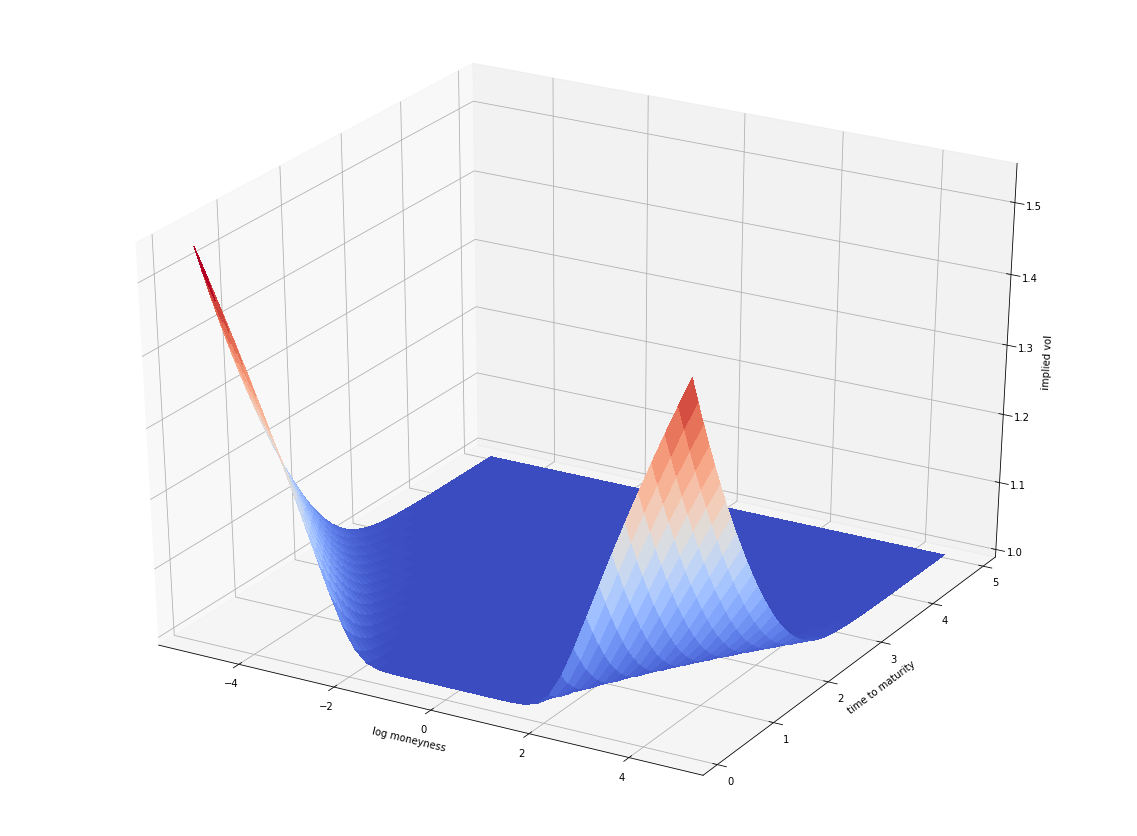

In [178]:
fig = plt.figure(figsize=(20,15))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(k, t, sigma2,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('log moneyness')
ax.set_ylabel('time to maturity')
ax.set_zlabel('implied vol')
plt.show()